In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.3.1+cu121'

## Data preparation and loading
* Excel/CSV
* Images
* Videos
* Audio
* DNA
* Text

Two tasks for machine learning:
1. Convert data into numerical representation.
2. Build a model to learn the patterns in that numerical representation.

Using Linear Regression as starter

In [3]:
# Create 'known' parameters
weight = 0.7
bias = 0.3

# Create Data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
# Spliting Data into test and train datas

In [5]:
train_split = int(0.8 * len(X))
train_split

40

In [6]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing Data

In [8]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c='b', s=4, label="Training Data")

    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size":14})

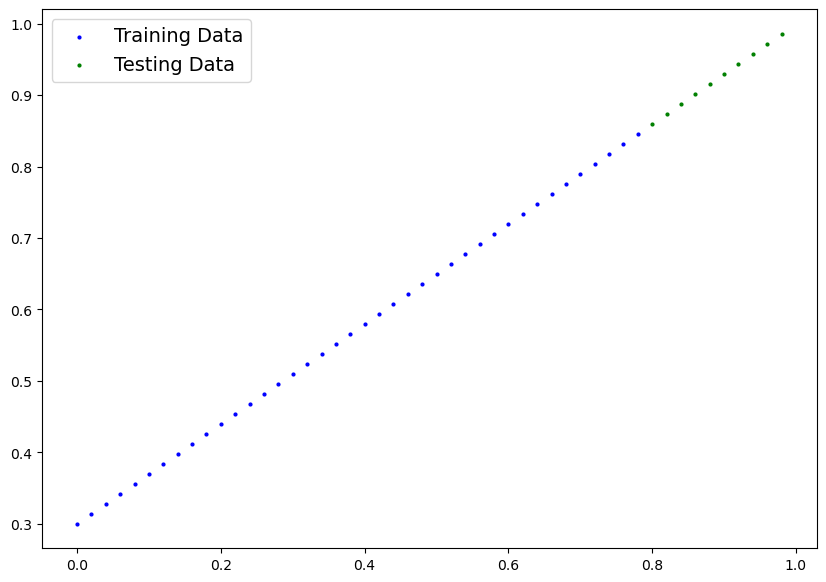

In [9]:
plot_predictions()

### Building model

What our model does?
* Start with random values (weights and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How?

Through 2 main algorithms:
1. Gradient Descent
2. Backpropagation

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))   # Requires_grad -> gradient descent
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the training/input data
            return self.weights*x + self.bias


        